In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sps

from phaseunwrapping import wrap_function, build_2d_first_order_grad, upsampling_matrix, mle_2d

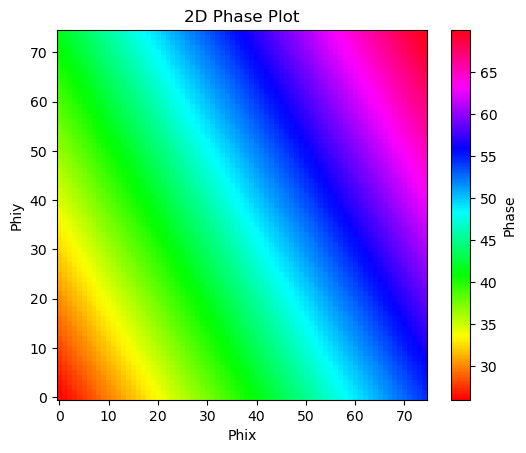

In [2]:
# create phase date for x and y direction
M = 75
N = 75
phix = np.linspace(0, 9*np.pi, M) + (3*np.pi) + 3
phiy = np.linspace(0, 5*np.pi, N) + (4*np.pi) + 1
X, Y = np.meshgrid(phix, phiy)
phi = X + Y

# Create the phase plot (source Chat GPT for the below code)
plt.imshow(phi, cmap='hsv', origin='lower')
plt.colorbar(label='Phase')
plt.xlabel('Phix')
plt.ylabel('Phiy')
plt.title('2D Phase Plot')
plt.show()

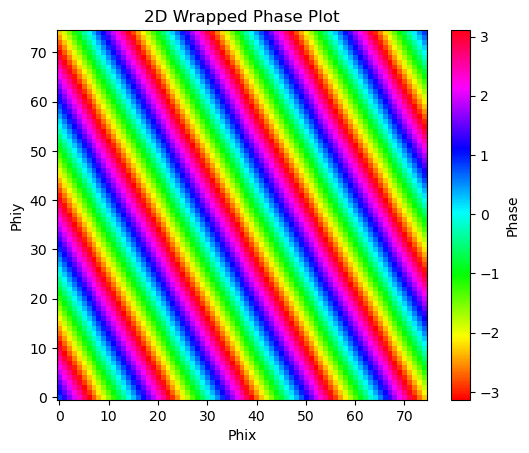

In [3]:
psi = wrap_function(phi)
plt.imshow(psi, cmap='hsv', origin='lower')
plt.colorbar(label='Phase')
plt.xlabel('Phix')
plt.ylabel('Phiy')
plt.title('2D Wrapped Phase Plot')
plt.show()


In [4]:
Fx, Fy = build_2d_first_order_grad(M,N, boundary="none")

In [5]:
reconstructed_phi = mle_2d(psi, Fx, Fy, weights=None, solve_method="direct", cg_tol=1e-4, cg_maxits=None)

In [8]:
reconstructed_phi = mle_2d(psi, Fx, Fy, weights=None, solve_method="iterative", cg_tol=1e-4, cg_maxits=None, cg_x0=reconstructed_phi[1:] + 0.1*np.random.normal(size=reconstructed_phi[1:].shape))

In [6]:
reconstructed_phi = mle_2d(psi, Fx, Fy, weights=None, solve_method="iterative", cg_tol=1e-4, cg_maxits=None)

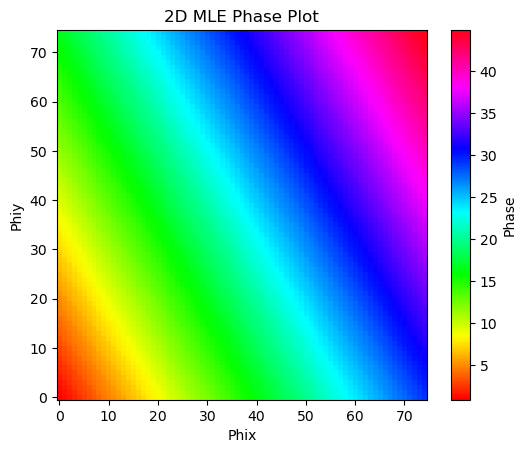

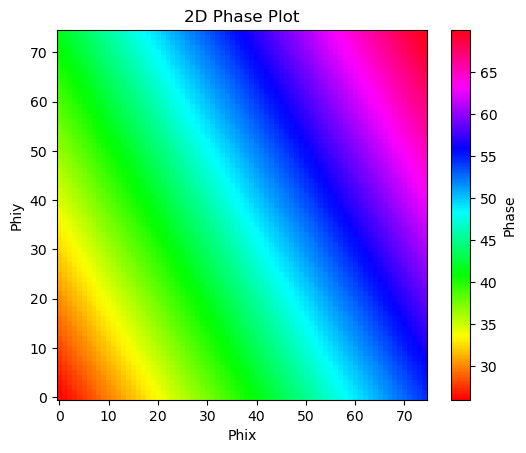

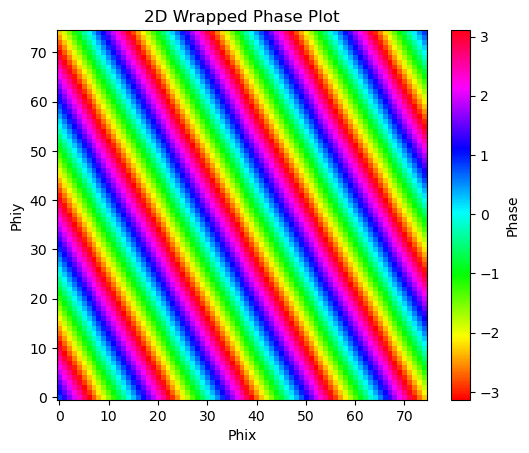

In [9]:
#reconstructed_phi = solve_D2_MLE_2D(psi, Fx, Fy)
reconstructed_phi = reconstructed_phi.reshape(M,N)
plt.imshow(reconstructed_phi, cmap='hsv', origin='lower')
plt.colorbar(label='Phase')
plt.xlabel('Phix')
plt.ylabel('Phiy')
plt.title('2D MLE Phase Plot')
plt.show()

plt.imshow(phi, cmap='hsv', origin='lower')
plt.colorbar(label='Phase')
plt.xlabel('Phix')
plt.ylabel('Phiy')
plt.title('2D Phase Plot')
plt.show()


plt.imshow(psi, cmap='hsv', origin='lower')
plt.colorbar(label='Phase')
plt.xlabel('Phix')
plt.ylabel('Phiy')
plt.title('2D Wrapped Phase Plot')
plt.show()

# notice the same phase plot basically exceot subtract about 25 from phase